In [1]:
import pandas as pd
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("Data2.csv") #Electric Vehicle Title and Registration Activity

In [3]:
df.head(3)

,Clean Alternative Fuel Vehicle Type,VIN (1-10),Model Year,Make,Model,New or Used Vehicle,Sale Price,DOL Transaction Date,Transaction Type,Transaction Year,...,DOL Vehicle ID,Legislative District,2019 HB 2042 Clean Alternative Fuel Vehicle (CAFV) Eligibility,Meets 2019 HB 2042 Electric Range Requirement,Meets 2019 HB 2042 Sale Date Requirement,Meets 2019 HB 2042 Sale Price/Value Requirement,Odometer Reading,Odometer Code,Transportation Electrification Fee Paid,Hybrid Vehicle Electrification Fee Paid
0,Battery Electric Vehicle (BEV),5YJXCDE22G,2016,TESLA,Model X,New,0,March 08 2017,Original Registration,2017,...,9059788,41.0,"TRANSACTION NOT ELIGIBLE: Non-sale, registrati...",True,False,False,0,Odometer reading is not collected at time of r...,No,No
1,Battery Electric Vehicle (BEV),3C3CFFGE8D,2013,FIAT,500,Used,0,February 09 2017,Original Registration,2017,...,116849386,48.0,"TRANSACTION NOT ELIGIBLE: Non-sale, registrati...",True,False,False,0,Odometer reading is not collected at time of r...,No,No
2,Battery Electric Vehicle (BEV),1N4AZ0CP6E,2014,NISSAN,Leaf,Used,0,January 05 2017,Original Registration,2017,...,102634059,34.0,"TRANSACTION NOT ELIGIBLE: Non-sale, registrati...",True,False,False,0,Odometer reading is not collected at time of r...,No,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331974 entries, 0 to 331973
Data columns (total 30 columns):
 #   Column                                                          Non-Null Count   Dtype  
---  ------                                                          --------------   -----  
 0   Clean Alternative Fuel Vehicle Type                             331974 non-null  object 
 1   VIN (1-10)                                                      331974 non-null  object 
 2   Model Year                                                      331974 non-null  int64  
 3   Make                                                            331974 non-null  object 
 4   Model                                                           331974 non-null  object 
 5   New or Used Vehicle                                             331974 non-null  object 
 6   Sale Price                                                      331974 non-null  int64  
 7   DOL Transaction Date                  

In [5]:
#Doing this to get the indexes of the columns I'll drop. 
for x in enumerate(list(df.columns)):
    print (x)

(0, 'Clean Alternative Fuel Vehicle Type')
(1, 'VIN (1-10)')
(2, 'Model Year')
(3, 'Make')
(4, 'Model')
(5, 'New or Used Vehicle')
(6, 'Sale Price')
(7, 'DOL Transaction Date')
(8, 'Transaction Type')
(9, 'Transaction Year')
(10, 'Electric Vehicle Fee Paid')
(11, 'County')
(12, 'City')
(13, 'Zip')
(14, 'Electric Range')
(15, 'Base MSRP')
(16, '2015 HB 2778 Exemption Eligibility')
(17, 'Sale Date')
(18, 'Vehicle Primary Use')
(19, 'State of Residence')
(20, 'DOL Vehicle ID')
(21, 'Legislative District')
(22, '2019 HB 2042 Clean Alternative Fuel Vehicle (CAFV) Eligibility')
(23, 'Meets 2019 HB 2042 Electric Range Requirement')
(24, 'Meets 2019 HB 2042 Sale Date Requirement')
(25, 'Meets 2019 HB 2042 Sale Price/Value Requirement')
(26, 'Odometer Reading')
(27, 'Odometer Code')
(28, 'Transportation Electrification Fee Paid')
(29, 'Hybrid Vehicle Electrification Fee Paid')


In [6]:
df = df.drop(df.columns[[1, 6, 8,10,15,16,17,18,20,21,22,23,24,25,26,27,28,29]], axis = 1)

In [7]:
df.head()

,Clean Alternative Fuel Vehicle Type,Model Year,Make,Model,New or Used Vehicle,DOL Transaction Date,Transaction Year,County,City,Zip,Electric Range,State of Residence
0,Battery Electric Vehicle (BEV),2016,TESLA,Model X,New,March 08 2017,2017,King,BELLEVUE,98006.0,200,WA
1,Battery Electric Vehicle (BEV),2013,FIAT,500,Used,February 09 2017,2017,King,KIRKLAND,98033.0,87,WA
2,Battery Electric Vehicle (BEV),2014,NISSAN,Leaf,Used,January 05 2017,2017,King,SEATTLE,98116.0,84,WA
3,Plug-in Hybrid Electric Vehicle (PHEV),2017,CHEVROLET,Volt,New,January 18 2017,2017,King,BURIEN,98166.0,53,WA
4,Battery Electric Vehicle (BEV),2017,BMW,i3,New,January 18 2017,2017,Clark,VANCOUVER,98685.0,81,WA


In [8]:
df['State of Residence'].unique()

array(['WA', 'MD', 'AZ', 'VA', 'GA', 'MI', 'PA', 'CA', 'NC', 'OR', 'OH',
       'TX', 'FL', 'CO', nan, 'WI', 'MN', 'CT', 'NH', 'NV', 'IN', 'MT',
       'IL', 'AL', 'DC', 'HI', 'NE', 'NY', 'NJ', 'UT', 'KY', 'TN', 'LA',
       'MA', 'OK', 'WY', 'DE', 'SC', 'AK', 'MO', 'NM', 'ID', 'KS', 'MS',
       'SD', 'ND', 'RI'], dtype=object)

In [9]:
#Selecting just the records of the state Washington.
mask = df['State of Residence'] == 'WA'

In [10]:
df[mask].head(2)

,Clean Alternative Fuel Vehicle Type,Model Year,Make,Model,New or Used Vehicle,DOL Transaction Date,Transaction Year,County,City,Zip,Electric Range,State of Residence
0,Battery Electric Vehicle (BEV),2016,TESLA,Model X,New,March 08 2017,2017,King,BELLEVUE,98006.0,200,WA
1,Battery Electric Vehicle (BEV),2013,FIAT,500,Used,February 09 2017,2017,King,KIRKLAND,98033.0,87,WA


In [21]:
dfw = df[mask].copy(deep=True)

In [22]:
#Verifiying that we just hae records from Washington

In [23]:
dfw['State of Residence'].unique()

array(['WA'], dtype=object)

In [24]:
#Verifying just having the 39 counties of WA

In [25]:
dfw.County.nunique()

39

In [26]:
dfw['Transaction Year'].unique()

array([2017, 2016, 2018, 2010, 2011, 2013, 2012, 2014, 2019, 2015, 2020,
       2021])

In [27]:
#Filtering by the year

In [28]:
dfw = dfw[dfw['Transaction Year'].between(2020, 2021, inclusive=True)]

In [29]:
dfw['Transaction Year'].unique()

array([2020, 2021])

In [30]:
dfw['Electric Range'].nunique()

99

In [31]:
#Checking the minimun and maximun values for the range

In [32]:
dfw.sort_values(by= 'Electric Range', ascending=True).head(2)

,Clean Alternative Fuel Vehicle Type,Model Year,Make,Model,New or Used Vehicle,DOL Transaction Date,Transaction Year,County,City,Zip,Electric Range,State of Residence
64730,Battery Electric Vehicle (BEV),2021,TESLA,Model 3,New,April 07 2021,2021,King,BELLEVUE,98005.0,0,WA
254185,Battery Electric Vehicle (BEV),2021,TESLA,Model Y,New,May 03 2021,2021,Snohomish,EDMONDS,98026.0,0,WA


In [33]:
#I'll drop the rows where the Electric Range is 0. 

In [34]:
dfw.sort_values(by= 'Electric Range', ascending=False).head(2)

,Clean Alternative Fuel Vehicle Type,Model Year,Make,Model,New or Used Vehicle,DOL Transaction Date,Transaction Year,County,City,Zip,Electric Range,State of Residence
19273,Battery Electric Vehicle (BEV),2020,TESLA,Model S,Used,April 14 2021,2021,King,BELLEVUE,98008.0,337,WA
91814,Battery Electric Vehicle (BEV),2020,TESLA,Model S,New,January 21 2020,2020,King,SEATTLE,98122.0,337,WA


In [35]:
#The higher end of the range seems to be ok

In [36]:
#Filtering out those that have 0 as Electric Range (missing value)

In [37]:
dfw = dfw[~dfw['Electric Range'].between(0,1, inclusive=True)]

In [38]:
dfw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116565 entries, 1965 to 331621
Data columns (total 12 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Clean Alternative Fuel Vehicle Type  116565 non-null  object 
 1   Model Year                           116565 non-null  int64  
 2   Make                                 116565 non-null  object 
 3   Model                                116565 non-null  object 
 4   New or Used Vehicle                  116565 non-null  object 
 5   DOL Transaction Date                 116565 non-null  object 
 6   Transaction Year                     116565 non-null  int64  
 7   County                               116565 non-null  object 
 8   City                                 116531 non-null  object 
 9   Zip                                  116559 non-null  float64
 10  Electric Range                       116565 non-null  int64  
 11  State of R

In [39]:
#Droping the null values.
dfw.dropna(how='any',inplace=True)

In [40]:
#Maybe getting rid of the hybrids and just focusing on the purely electrics? 
dfw = dfw[dfw['Clean Alternative Fuel Vehicle Type'] == 'Battery Electric Vehicle (BEV)']

In [41]:
dfw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81607 entries, 1965 to 331621
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Clean Alternative Fuel Vehicle Type  81607 non-null  object 
 1   Model Year                           81607 non-null  int64  
 2   Make                                 81607 non-null  object 
 3   Model                                81607 non-null  object 
 4   New or Used Vehicle                  81607 non-null  object 
 5   DOL Transaction Date                 81607 non-null  object 
 6   Transaction Year                     81607 non-null  int64  
 7   County                               81607 non-null  object 
 8   City                                 81607 non-null  object 
 9   Zip                                  81607 non-null  float64
 10  Electric Range                       81607 non-null  int64  
 11  State of Residence      

In [42]:
dfwc = dfw.groupby(by='County')

In [54]:
dfwc.get_group('Adams').shape[0]

21

In [53]:
dfwc.get_group('Asotin').shape[0]

36

#Gonna make the random sample to get around 50.000 values. 
#For this, I'll be getting 42% of each group after grouping by county. 

dfwc = dfw.groupby(by=['County']).sample(frac=.42, random_state=23)

print(f'There are {dfwc.shape[0]} rows now')

dfwc.head(2)

#I think data is clean and small enough to start working with it on Google Sheets. 
#Or maybe we want to do some EDA before that? 

#Top 5 of brands in the State

<AxesSubplot:xlabel='Make'>

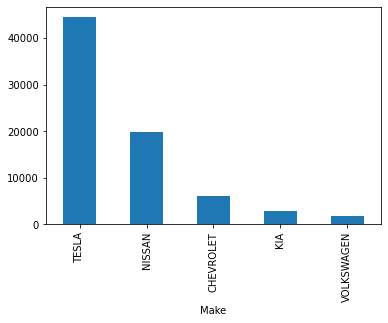

In [56]:
dfw.groupby('Make').size().sort_values(ascending=False)[:5].plot(kind='bar')

<AxesSubplot:ylabel='None'>

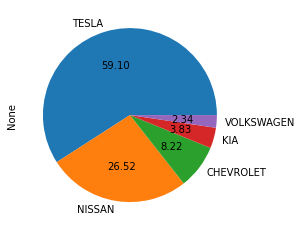

In [57]:
dfw.groupby('Make').size().sort_values(ascending=False)[0:5].plot(kind='pie', autopct='%.2f')

In [270]:
#We can see how Tesla have dominance in the state, but... Let's see what insights can we get,
#when we start analyzing on the county level. 

In [271]:
#Alright, I think I'm ready to see the data in Google Sheets. 

In [58]:
dfw.to_csv('Data88.csv', index=False)

In [61]:
df2 = pd.read_csv('Data88.csv')

In [62]:
df2.head(3)

,Clean Alternative Fuel Vehicle Type,Model Year,Make,Model,New or Used Vehicle,DOL Transaction Date,Transaction Year,County,City,Zip,Electric Range,State of Residence
0,Battery Electric Vehicle (BEV),2019,NISSAN,Leaf,New,January 15 2020,2020,Snohomish,WOODWAY,98020.0,150,WA
1,Battery Electric Vehicle (BEV),2020,TESLA,Model 3,New,January 21 2020,2020,King,SEATTLE,98117.0,322,WA
2,Battery Electric Vehicle (BEV),2011,NISSAN,Leaf,Used,January 14 2020,2020,Thurston,OLYMPIA,98501.0,73,WA
